In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [25]:
(trainX, trainY),(testX,testY)=cifar10.load_data()

In [26]:
trainX.shape

(50000, 32, 32, 3)

In [27]:
trainY

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
testX.shape

(10000, 32, 32, 3)

In [29]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [30]:
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [31]:
model=Sequential()
model.add(Conv2D(32, (3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu' ))
model.add(Dense(64,activation='relu' ))
model.add(Dense(32,activation='relu' ))
model.add(Dense(10,activation='softmax' ))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,554 (330.29 KB)

 Trainable params: 84,554 (330.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(train_norm,trainY, epochs=500, batch_size=5000, verbose=1)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.1498 - loss: 2.2917
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.2214 - loss: 2.1699
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.2492 - loss: 2.0412
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.2920 - loss: 1.9390
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.3165 - loss: 1.8658
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.3401 - loss: 1.8009
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.3692 - loss: 1.7421
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.3807 - loss: 1.6982
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.4048 - loss: 1.6482
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4168 - loss: 1.6124
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.4268 - loss: 1.5763
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1

In [35]:
from tensorflow.keras.models import model_from_json
model_json=model.to_json()

with open("model.json","w") as json_file:
  json_file.write(model_json)


  # Change 'model.h5' to 'model.weights.h5' or use model.save() to save the entire model
  model.save_weights('model.weights.h5') # This fixes the error to save only the weights
  # or
  # model.save('model.keras') # This saves the entire model including architecture and is generally preferred

In [36]:
json_file = open('model.json','r')
loaded_model_json =json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [37]:
loaded_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,664 (990.88 KB)

 Trainable params: 84,554 (330.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 169,110 (660.59 KB)

In [38]:
loaded_model.load_weights('model.weights.h5') # Change 'model.h5' to 'model.weights.h5'

In [39]:
p = loaded_model.predict(testX)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
import numpy as np
import pandas as pd

labels_test_predicted = np.argmax(p,1)

labels_test_predicted

array([8, 1, 0, ..., 5, 1, 7])

In [41]:
pd.crosstab(np.argmax(testY,axis=1), labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,803,34,16,2,4,2,6,25,47,61
1,36,828,2,2,1,2,1,5,29,94
2,276,45,246,50,20,90,15,141,56,61
3,107,56,17,307,18,153,23,136,85,98
4,197,52,21,69,182,70,14,273,48,74
5,53,28,16,115,6,492,8,170,37,75
6,72,77,23,81,17,43,427,48,83,129
7,50,24,9,12,8,32,0,760,17,88
8,177,42,2,0,1,3,2,12,713,48


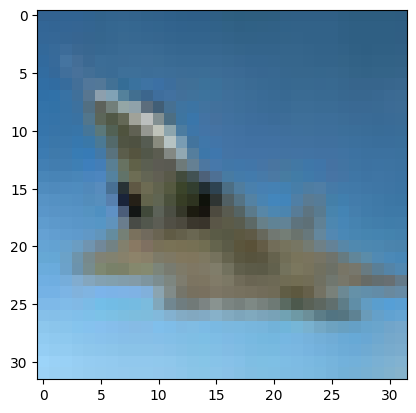

In [42]:
import matplotlib.pyplot as plt

ind=7102
sample_image =testX[ind,:,:,:]

pixels=sample_image.reshape((32,32,3))
plt.imshow(pixels,cmap='gray')
plt.show()

In [43]:
print('real label', np.argmax(testY[ind]))
print('predicted label', np.argmax(labels_test_predicted[ind]))

real label 0
predicted label 0
